<a href="https://colab.research.google.com/github/satyajitghana/TSAI-DeepVision-EVA4.0/blob/master/12_TinyImageNet/Doggos/Doggo_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [0]:
import requests
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import os
import numpy as np
sns.set()
plt.style.use("dark_background")

In [15]:
!git clone https://github.com/satyajitghana/TSAI-DeepVision-EVA4.0

Cloning into 'TSAI-DeepVision-EVA4.0'...
remote: Enumerating objects: 394, done.
remote: Counting objects: 100% (394/394), done.
remote: Compressing objects: 100% (303/303), done.
remote: Total 675 (delta 136), reused 297 (delta 67), pack-reused 281
Receiving objects: 100% (675/675), 82.70 MiB | 28.71 MiB/s, done.
Resolving deltas: 100% (274/274), done.
Checking out files: 100% (238/238), done.


In [0]:
BASE_DIR = 'TSAI-DeepVision-EVA4.0/12_TinyImageNet/Doggos/'

## Download Dooggo Annotation

In [21]:
open(os.path.join(BASE_DIR, 'annotations.json'), 'wb').write(myfile.content)

42192

## Load the JSON

In [0]:
with open('annotations.json') as fp:
    data = json.load(fp)

## Dump entire JSON

In [8]:
json_formatted = json.dumps(data, indent=2)
print(json_formatted)

{
  "0_GettyImages-1143342151.jpg114222": {
    "filename": "0_GettyImages-1143342151.jpg",
    "size": 114222,
    "regions": [
      {
        "shape_attributes": {
          "name": "rect",
          "x": 545,
          "y": 5,
          "width": 521,
          "height": 476
        },
        "region_attributes": {
          "name": "not_defined",
          "type": "dog",
          "image_quality": {
            "good": true,
            "frontal": true,
            "good_illumination": true
          }
        }
      }
    ],
    "file_attributes": {
      "caption": "",
      "public_domain": "no",
      "image_url": ""
    }
  },
  "1_JS205555318.jpg145133": {
    "filename": "1_JS205555318.jpg",
    "size": 145133,
    "regions": [
      {
        "shape_attributes": {
          "name": "rect",
          "x": 301,
          "y": 41,
          "width": 638,
          "height": 848
        },
        "region_attributes": {
          "name": "not_defined",
          "type": "dog"

## Dump single entry from annotations

In [47]:
print(json.dumps(data["Golden_Retriever_Dogs_Grass_Puppy_Two_Sitting.jpg334654"], indent=2))

{
  "filename": "Golden_Retriever_Dogs_Grass_Puppy_Two_Sitting.jpg",
  "size": 334654,
  "regions": [
    {
      "shape_attributes": {
        "name": "rect",
        "x": 360,
        "y": 250,
        "width": 355,
        "height": 574
      },
      "region_attributes": {
        "type": "dog",
        "image_quality": {
          "good": true,
          "frontal": true,
          "good_illumination": true
        }
      }
    },
    {
      "shape_attributes": {
        "name": "rect",
        "x": 662,
        "y": 214,
        "width": 380,
        "height": 617
      },
      "region_attributes": {
        "type": "dog",
        "image_quality": {
          "good": true,
          "frontal": true,
          "good_illumination": true
        }
      }
    }
  ],
  "file_attributes": {
    "caption": "",
    "public_domain": "no",
    "image_url": ""
  }
}


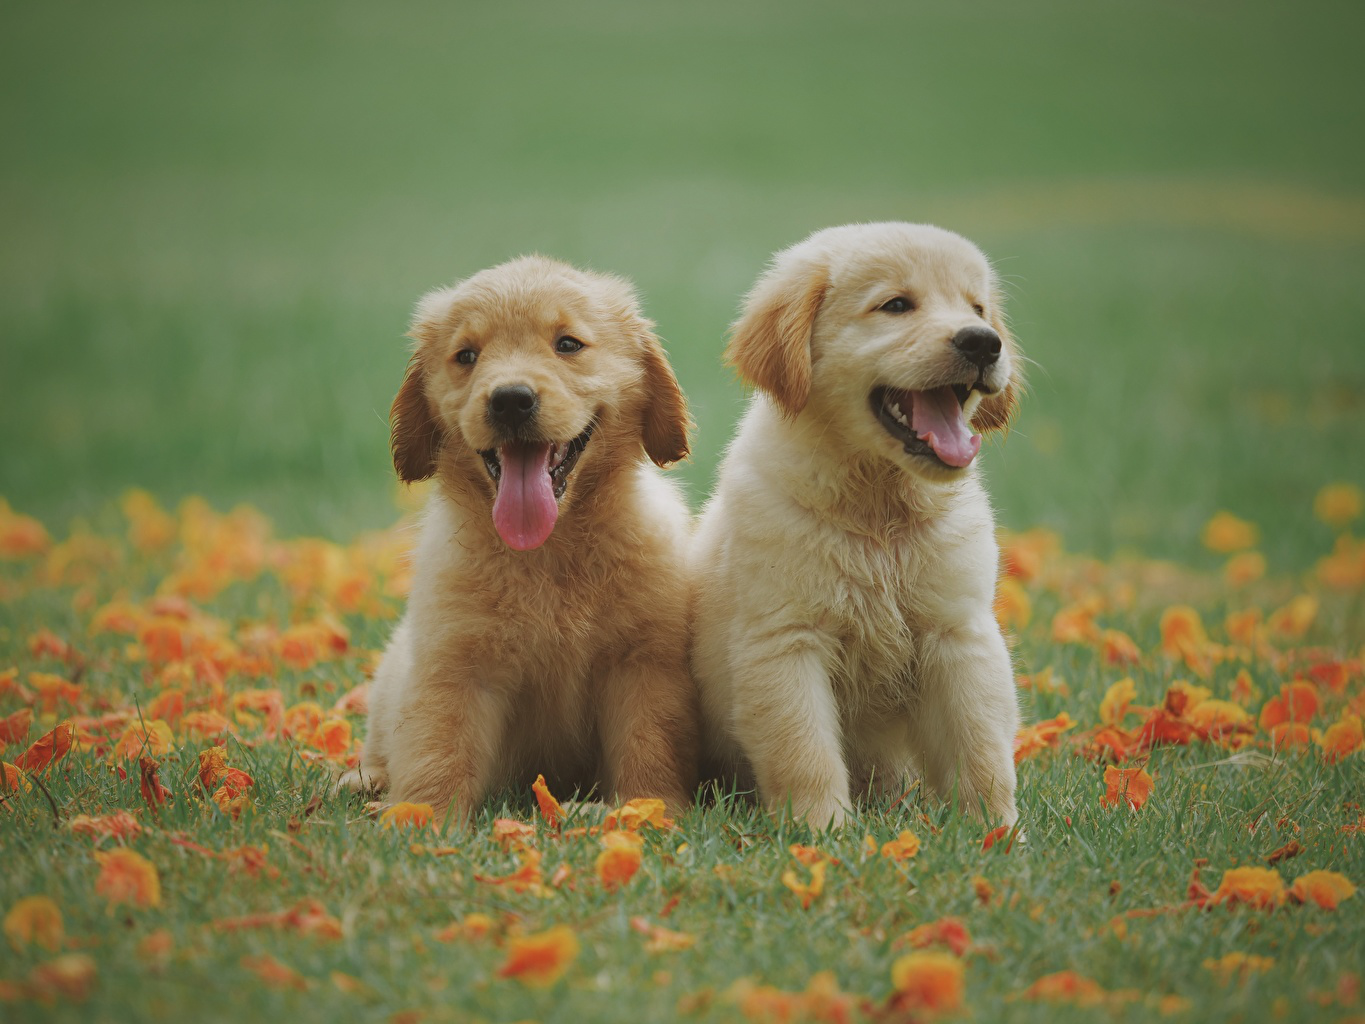

In [75]:
Image.open(os.path.join(BASE_DIR, "images", data["Golden_Retriever_Dogs_Grass_Puppy_Two_Sitting.jpg334654"]["filename"]))

In [0]:
def get_bbox(img_annot):
    bboxes = []
    for bbox in img_annot["regions"]:
        shape_attrs = bbox["shape_attributes"]
        x = shape_attrs["x"]
        y = shape_attrs["y"]
        width = shape_attrs["width"]
        height = shape_attrs["height"]

        bboxes.append((x, y, width, height))

    return bboxes

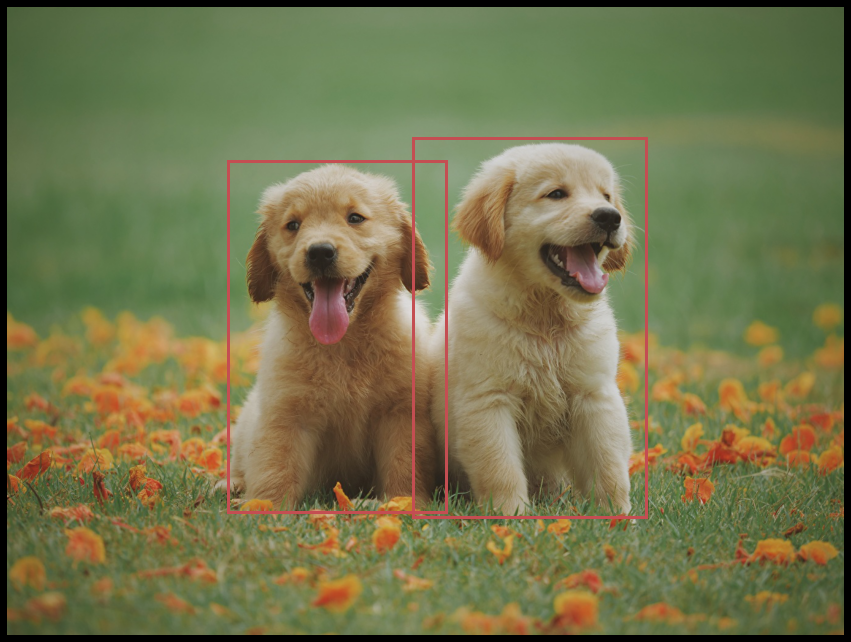

In [76]:
im = np.array(Image.open(os.path.join(BASE_DIR, "images", data["Golden_Retriever_Dogs_Grass_Puppy_Two_Sitting.jpg334654"]["filename"])))
bboxes = get_bbox(data["Golden_Retriever_Dogs_Grass_Puppy_Two_Sitting.jpg334654"])

# Create figure and axes
fig,ax = plt.subplots(1, figsize=(15,15))

# Display the image
ax.imshow(im)

for bbox in bboxes:
    x, y, width, height = bbox
    # Create a Rectangle patch
    rect = patches.Rectangle((x,y),width,height,linewidth=3,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
plt.axis('off')
plt.show()

## Data Analysis

In [0]:
def get_bboxratio(img_annot):
    ratios = []
    img_width, img_height = Image.open(os.path.join(BASE_DIR, "images", img_annot["filename"])).size
    for bbox in get_bbox(img_annot):
        x, y, width, height = bbox
        ratios.append([width/img_width, height/img_height])
    return ratios

In [0]:
# bounding box ratio - bbox_width/img_width and bbox_height/img_height
bbratio = []
for img_annot in data.values():
    bbratio.extend(get_bboxratio(img_annot))

In [0]:
bbratio = np.array(bbratio)

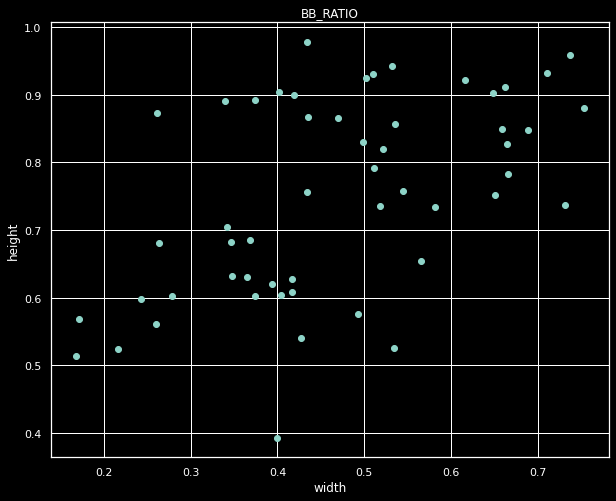

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(bbratio[:,0], bbratio[:,1], cmap="tab10")
plt.xlabel('width')
plt.ylabel('height')
plt.title('BB_RATIO')
plt.show()

# K-Means Clustering

In [0]:
from sklearn.cluster import KMeans

## Using Elbow Method to find cluster centers

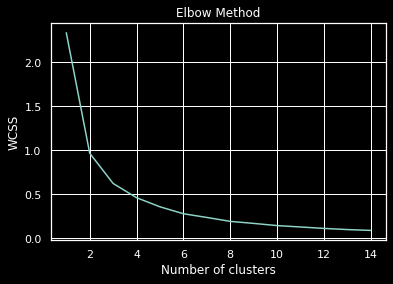

In [83]:
wcss = []
for c in range(1, 15):
    kmeans = KMeans(n_clusters=c, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(bbratio)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Choosing 4 clusters a optimum

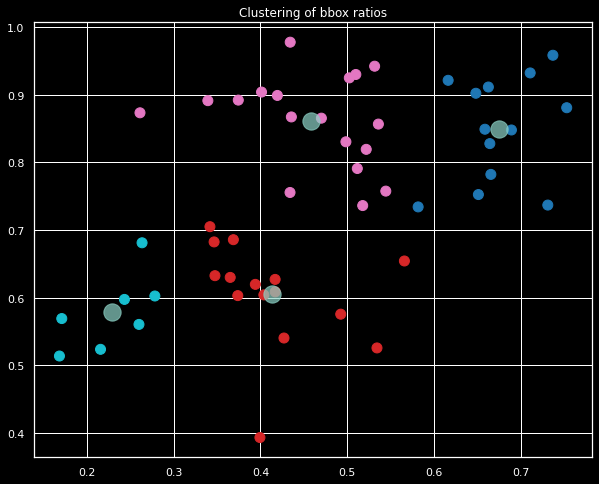

In [92]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(bbratio)
plt.figure(figsize=(10,8))
plt.scatter(bbratio[:,0], bbratio[:,1], c=pred_y, cmap="tab10", s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, alpha=.7)
plt.title('Clustering of bbox ratios')
plt.show()